# Statistical Models to Forecast Temperature and Humidity 

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

## Load Data

In [68]:
# parse the DWD dataset and convert date and align with home readings 
# Format dwd: yyyymmddhh
df = pd.read_csv('/Users/stewarta/repos/iot-htsensor/data/produkt_tu_stunde_19510101_20171231_00662.txt', sep=';')

# parse date, insert as column for sanity checking
df.insert(2, 'datetime', pd.to_datetime(df['MESS_DATUM'], errors='coerce', format='%Y%m%d%H'))

# create index
df.set_index('datetime', inplace=True)

# extract relevant columns and rename
df.rename(columns={'TT_TU':'D_Temp','RF_TU':'D_Humi'}, inplace=True)

# filter years
filter = (df.index.year >= 2013) & (df.index.year <= 2016) 

# filter columns
df = df.loc[filter,['D_Temp', 'D_Humi']]

# resample
frequency = 'M'
df = df.resample(frequency).mean()

# interpolate missing values
df = df.interpolate()

## fill na with mean valued :: df.resample("1d").sum().fillna(0).rolling(window=3, min_periods=1).mean()

df.head()

,D_Temp,D_Humi
datetime,,
2013-01-31,0.627957,88.754032
2013-02-28,0.075149,88.358631
2013-03-31,-0.523118,78.118280
2013-04-30,8.630972,69.386111
2013-05-31,12.421505,78.838710


In [69]:
df.shape

(48, 2)

## Exponential Smoothing

The Exponential Smoothing Model:


### Train and Predict

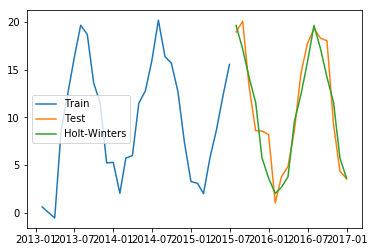

In [70]:
train, test = df.iloc[:30, 0], df.iloc[30:, 0]
model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=12).fit()
pred = model.predict(start=test.index[0], end=test.index[-1])

plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.legend(loc='best')